Title: When to Use Vertical Grouped Barplots
Slug: when-use-vertical-grouped-barplots
Summary: Examples of datasets to illustrate when to use grouped vertical barplots to compare amounts of two or more categories
Date: 2018-06-11 15:00  
Category: Data Visualizations
Subcategory: Best Practices
PostType: Tutorial
Tags: grouped barplots
Keywords: when use grouped barplots
Authors: Dan Friedman

Vertical bar charts are useful to illustrate sizes of data using different bar heights. A **vertical grouped barplot** often illustrates the sizes of multiple categories using different bar heights.

For example, let's say we had a service that rented out scooters in San Francisco, California. Customers can make a one-time rental or pay a monthly subscription fee and get unlimited rides for under 30 minutes. So, for each ride, we log if the customer was *individual* or *subscriber*. With these two categories for types of riders, we can see how they compare to one another with a multiple vertical bar chart.

I'll illustrate a few examples below of when vertical grouped bar plots are useful.

### Import Modules

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Example: Scooter Rides Per Month Over Time by Account Type

Let's continue with the example mentioned above. I'm curious about the trend of individual versus subscriber scooter rides over the past year. To get a high-level perspective, I think it would be helpful to look at the count of rides per month for each of these account types.

A sample of our *original* data would look like:

Date | Miles Ridden | Account Type
--- | --- | ---
6/9/2018 | 2.1 | Individual
6/10/2018 | 1.5 | Subscriber
6/10/2018 | 3.9 | Subscriber

We'd like get a count of rides on the monthly level broken out by account type. Therefore, given the data above, we'd perform a group by operation on a month-year field, then group by account type, and then count the number of rides. We'd end up with a sample of data looking like:

Month Year | Count Individual Rides | Count Subscriber Rides
--- | --- | ---
May 2017 | 31100 | 900
June 2017 | 33900 | 1100
July 2017 | 36380 | 1300


#### Generate Scooter Ride Data

In [28]:
month_list = [i.strftime("%b %Y") for i in pd.date_range(start='5-2017', end='5-2018', freq='MS')]

In [29]:
monthly_count_rides = [32000, 35000, 37680, 41500, 43300, 44000, 44350, 41000, 39000, 39500, 48000, 50000, 52000]
monthly_count_rides_subscribers = [900, 1100, 1300, 1800, 2860, 3300, 3350, 3480, 4005, 4790, 4980, 5150, 5290]

In [30]:
monthly_count_rides_individual = [month[0]-month[1] for month in zip(monthly_count_rides, monthly_count_rides_subscribers)]

#### Plot Scooter Rides

The reason a vertical grouped barplot works well in this scenario is because we're most interested to see the change in count of rides by *each* type - rather than a change in total rides of the account types combined. So, with separate bars for individual and subscription accounts, we can easily visualize the trend over time.

In [31]:
df = pd.DataFrame({'month_year': month_list, 'count_scooter_rides': monthly_count_rides, 
                    'count_scooter_rides_subscription': monthly_count_rides_subscribers,
                   'count_scooter_rides_individual': monthly_count_rides_individual})

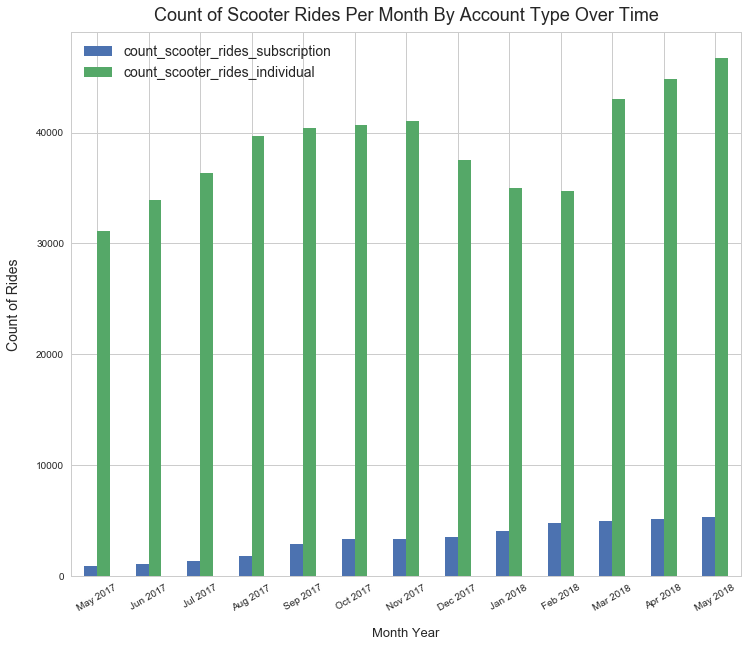

In [111]:
df.set_index('month_year')[['count_scooter_rides_subscription', 'count_scooter_rides_individual']].plot(kind='bar', figsize=(12, 10))
plt.xticks(rotation=30)
plt.title("Count of Scooter Rides Per Month By Account Type Over Time", fontsize=18, y=1.01)
plt.xlabel("Month Year", fontsize=13, labelpad=15)
plt.ylabel("Count of Rides", fontsize=14, labelpad=15)
plt.legend(fontsize=14);

#### Explanation of Scooter Rides Plot

There is a clear trend that the amount of rides by subscribers has increased every month since May 2017. Also, the increase has been pretty significant as the count of subscriber rides per month has doubled from May 2017 to May 2018.

However, individual scooter rides increased during the warmer months of 2017 from May to November. During the winter season, count of individual scooter rides decreased per month over several months. By March 2018, when the weather was much warmer, the count of individual rides per month drastically increased.

### Example: Favorite Sport to Play by Gender

Let's imagine we surveyed our friends - 8 male and 8 female, to ask them their favorite sport. We recorded each person's response. We only allowed responses for the following sports:

- basketball
- baseball
- lacrosse
- hockey
- soccer

A sample of our data would look like:

Name | Gender | Favorite Sport
--- | --- | ---
Jake | Male | Basketball
Michele | Female | Lacrosse
Elizabeth | Female | Soccer

We want to visualize the data in two ways: 1) see favorite sports by gender and 2) see breakdown of a specific sport's interest by gender.

#### Generate Fictional Data

In [80]:
sports = ['Basketball', 'Basketball', 'Basketball', 'Basketball', 'Baseball', 'Lacrosse', 'Lacrosse', 'Lacrosse', 'Lacrosse', 'Hockey', 'Hockey', 'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer']
genders = ['Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female']

#### Plot Categorized by Gender

In [77]:
df2 = pd.DataFrame({'favorite_sport': sports, 'gender': genders})

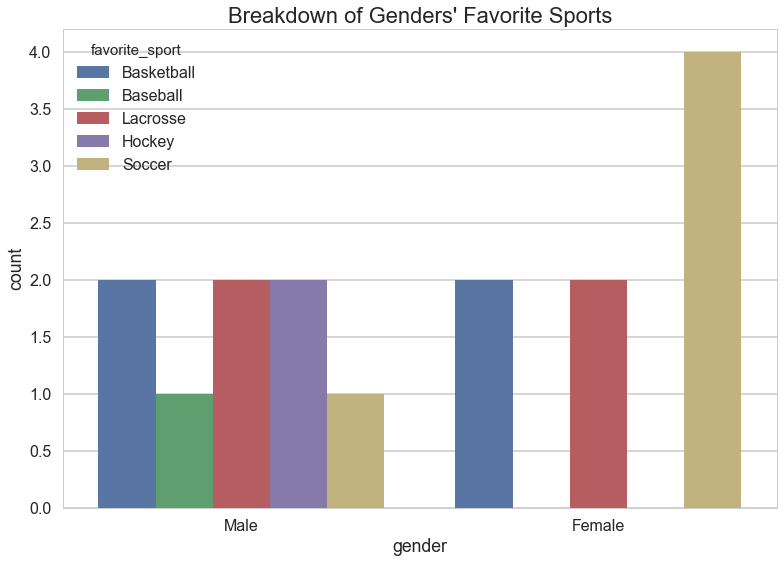

In [121]:
sns.set(style="whitegrid")
sns.set_context("poster")
ax = sns.countplot(x="gender", hue="favorite_sport", data=df2)
ax.axes.set_title("Breakdown of Genders' Favorite Sports", fontsize=22);

#### Explanation of Plot Categorized by Gender

We surveyed males who regarded all 5 options as one of their favorite sports. On the other hand, females only liked as their favorite sport Basketball, Lacrosse and Soccer.

Females' favorite sport is Lacrosse. Mens' favorite sport is a three-way tie between Basketball, Lacross and Hockey.



#### Plot Categorized by Sport 

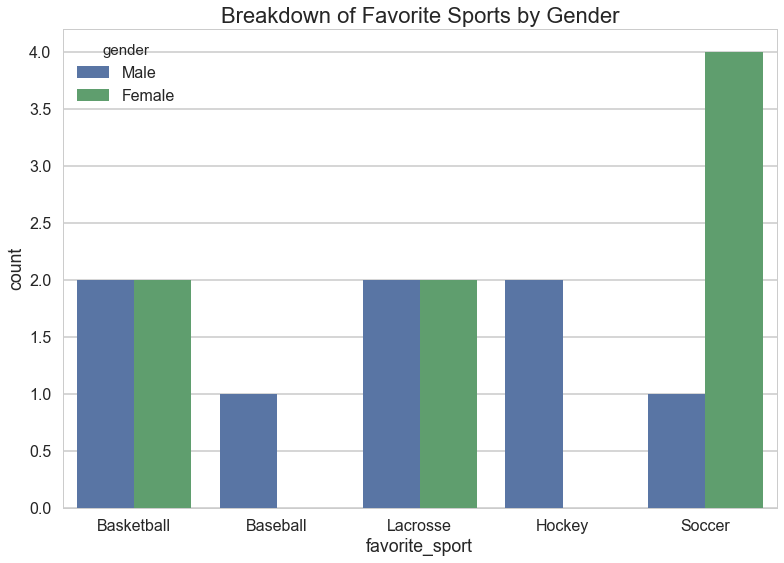

In [120]:
sns.set(style="whitegrid")
sns.set_context("poster")
ax = sns.countplot(x="favorite_sport", hue="gender", data=df2)
ax.axes.set_title("Breakdown of Favorite Sports by Gender", fontsize=22);

#### Explanation of Plot Categorized by Sport

Females prefer Soccer as their favorite sport far more than males.

No females surveyed regarded their favorite sport as Baseball or Hockey.

The same amount of males and females surveyed regarded Lacrosse and Basketball as their favorite sports.